In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_35428/226866674.py:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [9]:
len(y_test)

45

In [10]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [14]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [15]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [16]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [18]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

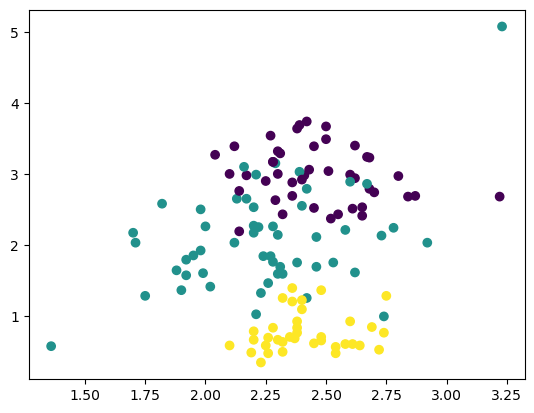

In [19]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(x=X_train['ash'], y=X_train['flavanoids'], c=y_train)
plt.show()

### Кластеризация на этом же наборе данных с этой же моделью

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

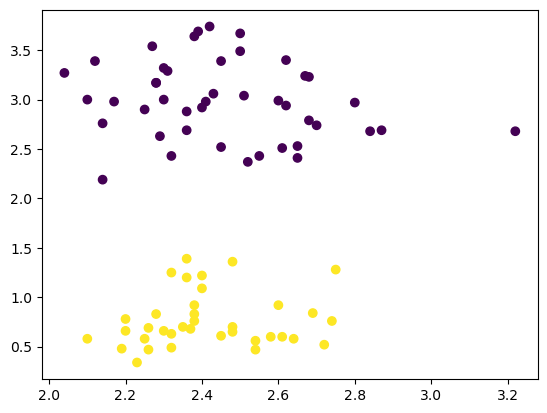

In [21]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=sy_train)
plt.show()

In [22]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [23]:
# посмотрим на центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.41416667, 0.76888889]])

/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


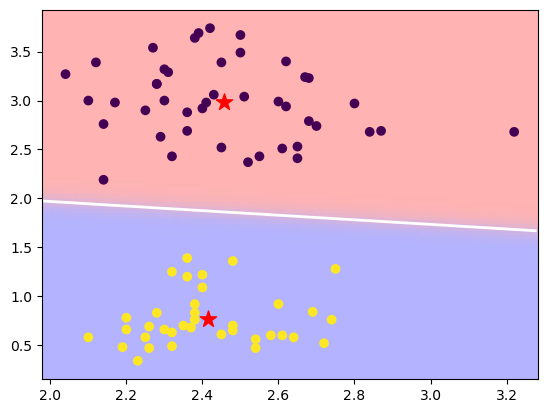

In [24]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [25]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ -4.34521388, -18.55400407]])

In [26]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [27]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [28]:
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [31]:
lr.predict(small_test)

array([0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2])

In [32]:
lr.predict_proba(small_test)

array([[0.97833843, 0.02166157],
       [0.93221038, 0.06778962],
       [0.01748813, 0.98251187],
       [0.98906371, 0.01093629],
       [0.98470796, 0.01529204],
       [0.03657192, 0.96342808],
       [0.01699277, 0.98300723],
       [0.9249254 , 0.0750746 ],
       [0.32848212, 0.67151788],
       [0.93628544, 0.06371456],
       [0.96922072, 0.03077928],
       [0.98460882, 0.01539118],
       [0.9986365 , 0.0013635 ],
       [0.06992502, 0.93007498],
       [0.01741858, 0.98258142],
       [0.02921382, 0.97078618],
       [0.95374429, 0.04625571],
       [0.83326892, 0.16673108],
       [0.01946681, 0.98053319],
       [0.98648154, 0.01351846],
       [0.95073277, 0.04926723],
       [0.99575354, 0.00424646],
       [0.18017589, 0.81982411],
       [0.02358443, 0.97641557],
       [0.10231164, 0.89768836],
       [0.9283567 , 0.0716433 ],
       [0.04201011, 0.95798989]])

In [33]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [34]:
lr.coef_

array([[-0.0835385, -3.1030043]])

/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


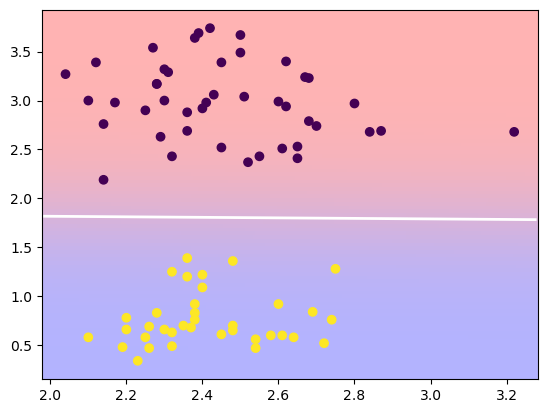

In [35]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [36]:
# генерируем искусвтенные данные
from sklearn.datasets import make_blobs

In [37]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [38]:
X

array([[  5.71110663,   5.54289048],
       [ -5.10801658,   3.06712439],
       [  7.44296139,   6.1566243 ],
       [  8.09952042,   4.57966007],
       [  6.54979637,   4.27413067],
       [  9.360185  ,   6.58506847],
       [ 12.91002023,   8.82364738],
       [  5.5299155 ,   3.09796884],
       [ -5.25113887,   7.56168679],
       [ -9.51769843,   5.27826186],
       [  6.47607903,   6.61287328],
       [  5.35094659,  -0.55301017],
       [  8.18496918,   7.23431606],
       [-11.18770485,   3.05871662],
       [ -8.12018012,  -1.65626284],
       [-11.96132106,   5.06546051],
       [-10.65575397,   1.084282  ],
       [  8.27162862,   8.35226617],
       [-10.63164783,   1.1459171 ],
       [  5.49205513,   6.21790006],
       [  4.49798415,   6.58620684],
       [  1.97376523,   7.45750385],
       [  6.59102367,   3.19921166],
       [  7.49799351,   6.3481578 ],
       [ -3.82584652,   0.51329342],
       [  6.99878731,  -0.86471066],
       [ -9.44002959,   4.43937199],
 

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_35428/1686605575.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)


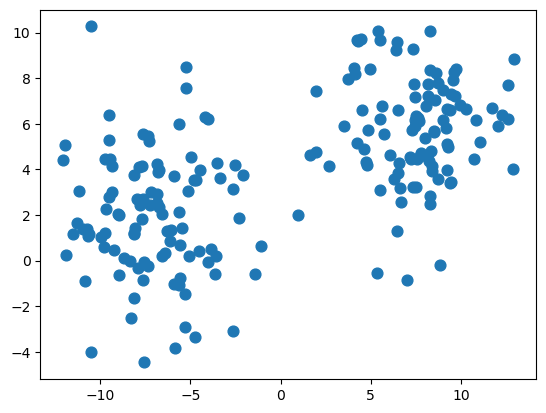

In [40]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [41]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [45]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
3
9
0


In [46]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 1.56398697],
       [-0.86780086],
       [ 1.56398697],
       [-0.5204026 ],
       [-0.86780086],
       [ 0.86919045],
       [ 0.52179219],
       [-0.17300433],
       [-1.21519912],
       [-0.86780086],
       [-0.86780086],
       [-0.86780086],
       [-0.86780086],
       [ 1.56398697],
       [ 1.56398697],
       [-0.86780086],
       [-0.86780086],
       [-0.86780086],
       [-1.21519912],
       [ 1.56398697],
       [-1.21519912],
       [-1.21519912],
       [-0.5204026 ],
       [-0.17300433],
       [ 0.52179219],
       [-0.5204026 ],
       [-0.17300433],
       [ 0.17439393],
       [ 0.86919045],
       [ 0.52179219],
       [ 1.56398697],
       [ 1.21658871],
       [ 0.17439393],
       [-1.56259738],
       [ 0.52179219],
       [-0.17300433],
       [-1.21519912],
       [ 1.21658871],
       [ 0.17439393],
       [ 1.21658871],
       [-1.21519912],
       [ 0.52179219],
       [-0.86780086],
       [ 0.52179219],
       [ 0.52179219],
       [-0

In [47]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.7253407560815015
-1.6827735453289452
1.5639869717854666
-1.5625973787407885


In [48]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.71585125,  0.53411119],
       [-0.68862086, -0.2526451 ],
       [ 0.94066999,  0.72914535],
       [ 1.02590045,  0.22801298],
       [ 0.8247248 ,  0.13092094],
       [ 1.18955218,  0.86529761],
       [ 1.65036999,  1.57667986],
       [ 0.69233013, -0.24284326],
       [-0.70720012,  1.17565028],
       [-1.26105867,  0.45001673],
       [ 0.81515527,  0.8741335 ],
       [ 0.66909748, -1.4030622 ],
       [ 1.03699289,  1.07161743],
       [-1.47784865, -0.25531695],
       [-1.07964143, -1.75365711],
       [-1.57827475,  0.38239208],
       [-1.40879405, -0.88275864],
       [ 1.04824248,  1.42688294],
       [-1.40566474, -0.86317205],
       [ 0.68741533,  0.74861774],
       [ 0.55837114,  0.86565936],
       [ 0.23069255,  1.14254271],
       [ 0.83007667, -0.21067002],
       [ 0.94781392,  0.79001143],
       [-0.52217742, -1.06420909],
       [ 0.88301004, -1.50211531],
       [-1.25097618,  0.18343181],
       [ 1.05802422,  0.30029277],
       [ 0.52848705,

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_35428/1343574465.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


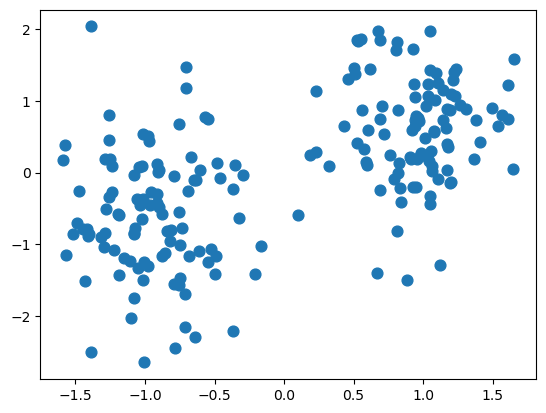

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [50]:
from sklearn.cluster import KMeans

In [51]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int32)

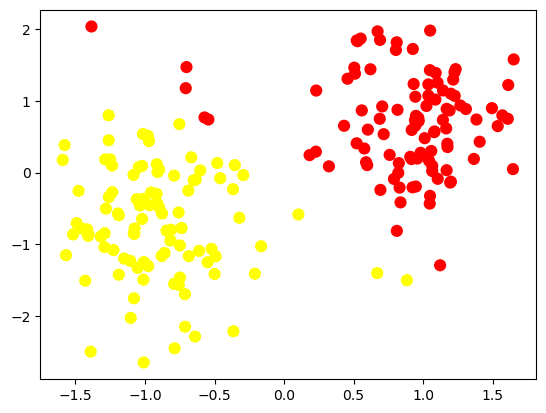

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [53]:
# строим график локтя

k_inertia = []

# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

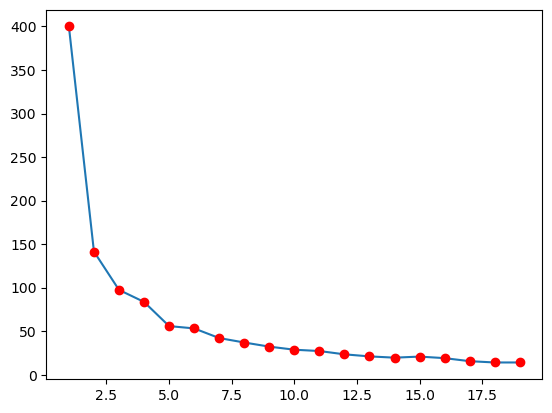

In [54]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

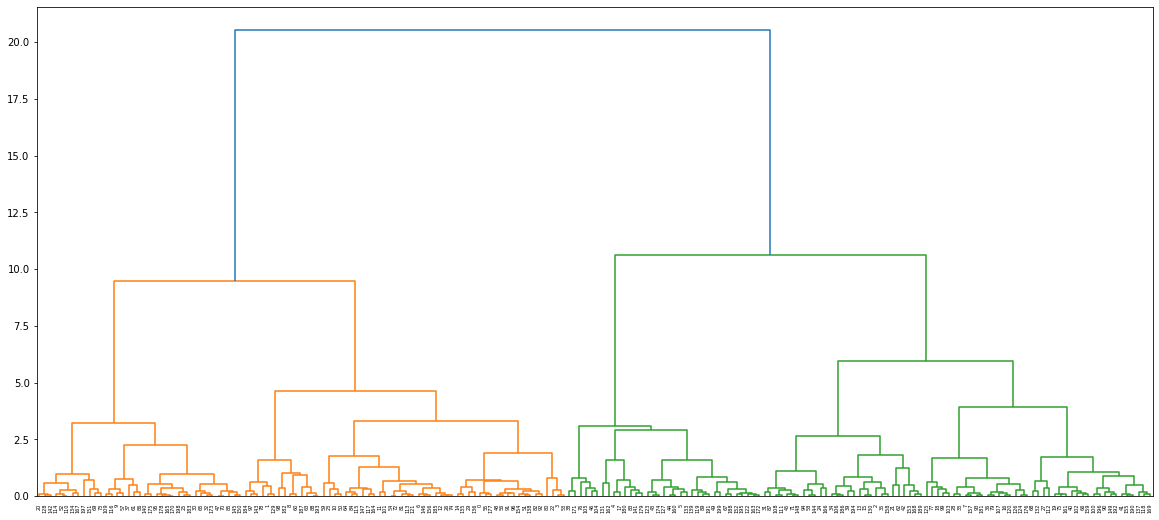

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

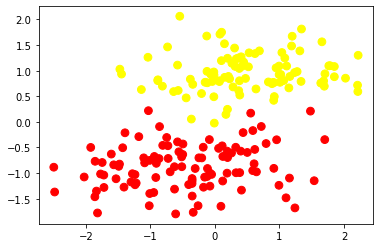

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-4.094006,3.828146,1
1,-6.594884,1.059300,1
2,-10.837313,-6.112001,0
3,-5.264367,5.994146,1
4,-3.369221,-5.703509,0
...,...,...,...
195,-5.030622,-6.498906,0
196,-7.140251,-5.526486,0
197,0.551539,3.569637,1
198,-2.399012,0.142734,1
